In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [12]:
SEED = 42

In [13]:
df = pd.read_csv('bank.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## 목적
포르투갈의 한 은행 기관의 직접 마케팅 캠페인.
접촉과 가입 여부 사이의 관계 파악.

## 데이터 변수 의미

### 은행 고객 데이터:
1 - age (숫자)

2 - job: 직업 유형

3 - marital: 결혼 상태

4 - education

5 - default:

6 - balance:

7 - housing:

8 - loan:

### 현재 캠페인의 마지막 접촉과 관련된 변수:
9 - contact: 접촉 통신 유형

10 - day: 마지막 접촉 날짜

11 - month: 마지막 접촉 월

12 - duration: 마지막 접촉 시간, 초 단위

### 기타 속성:
13 - campaign: 이번 캠페인 동안 이 고객에게 수행된 접촉 횟수

14 - pdays: 이전 캠페인 이후 고객이 마지막으로 접촉된 후 지난 일수

15 - previous: 이 고객에게 이전 캠페인 동안 수행된 접촉 횟수

16 - poutcome: 이전 마케팅 캠페인의 결과

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<ipython-input-49-5cdfe80f2fa2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette='deep')


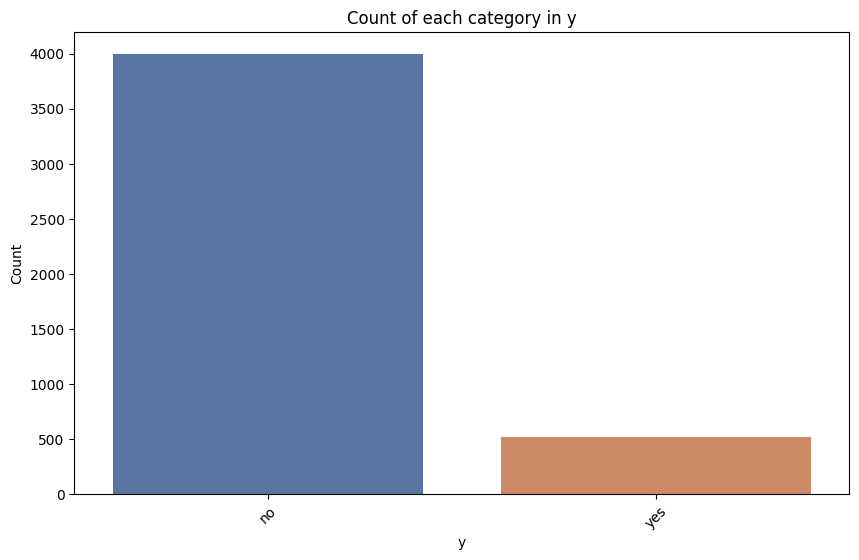

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='y', palette='deep')
plt.title(f'Count of each category in y')
plt.xlabel('y')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 수치형 변수 확인


balance , duration, campaign column의 이상치에 대한 관심



In [45]:
categorical_features = ['job','marital','education','default','housing','loan','contact','month','poutcome']
numerical_features = ['age','balance','duration','campaign','pdays','previous']



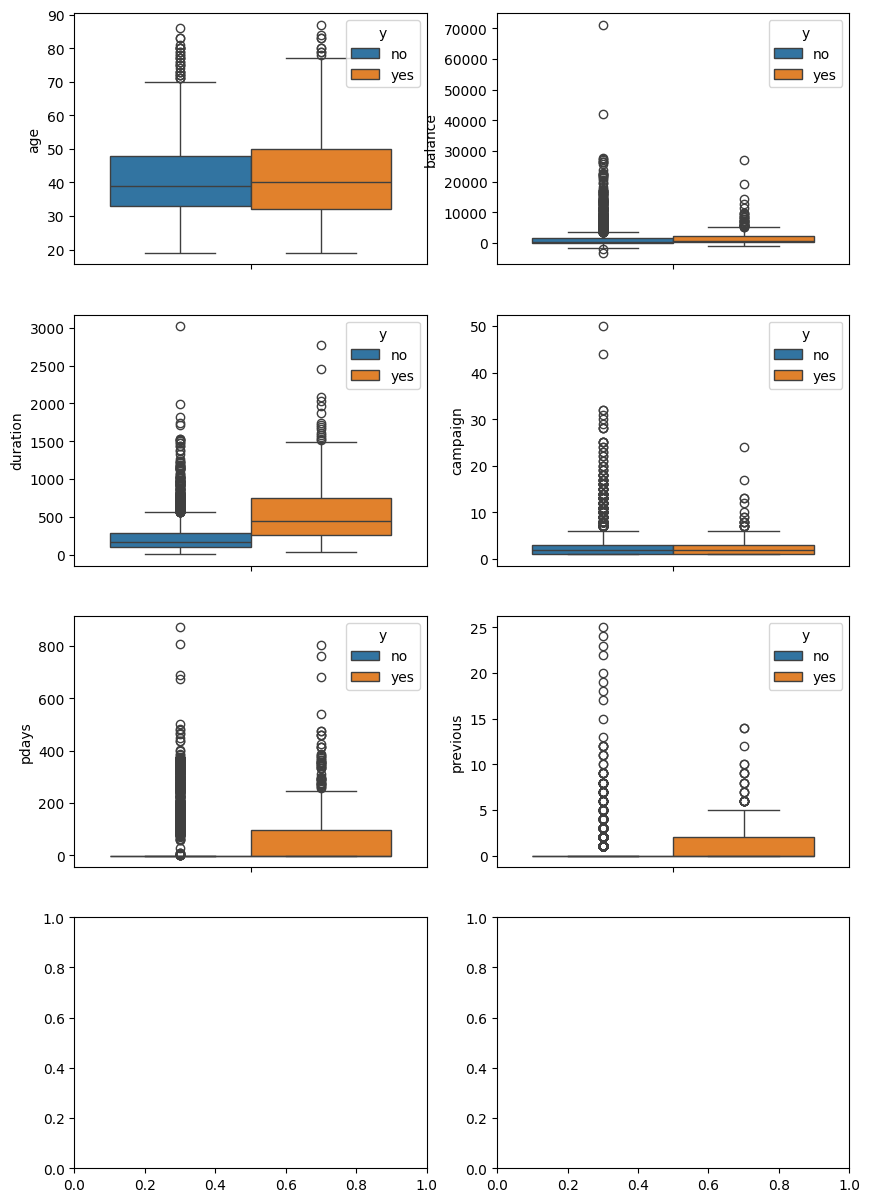

In [46]:
fig,axes = plt.subplots(4,2,figsize=(10,15))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, hue=df['y'], y=col, ax=axes[i])

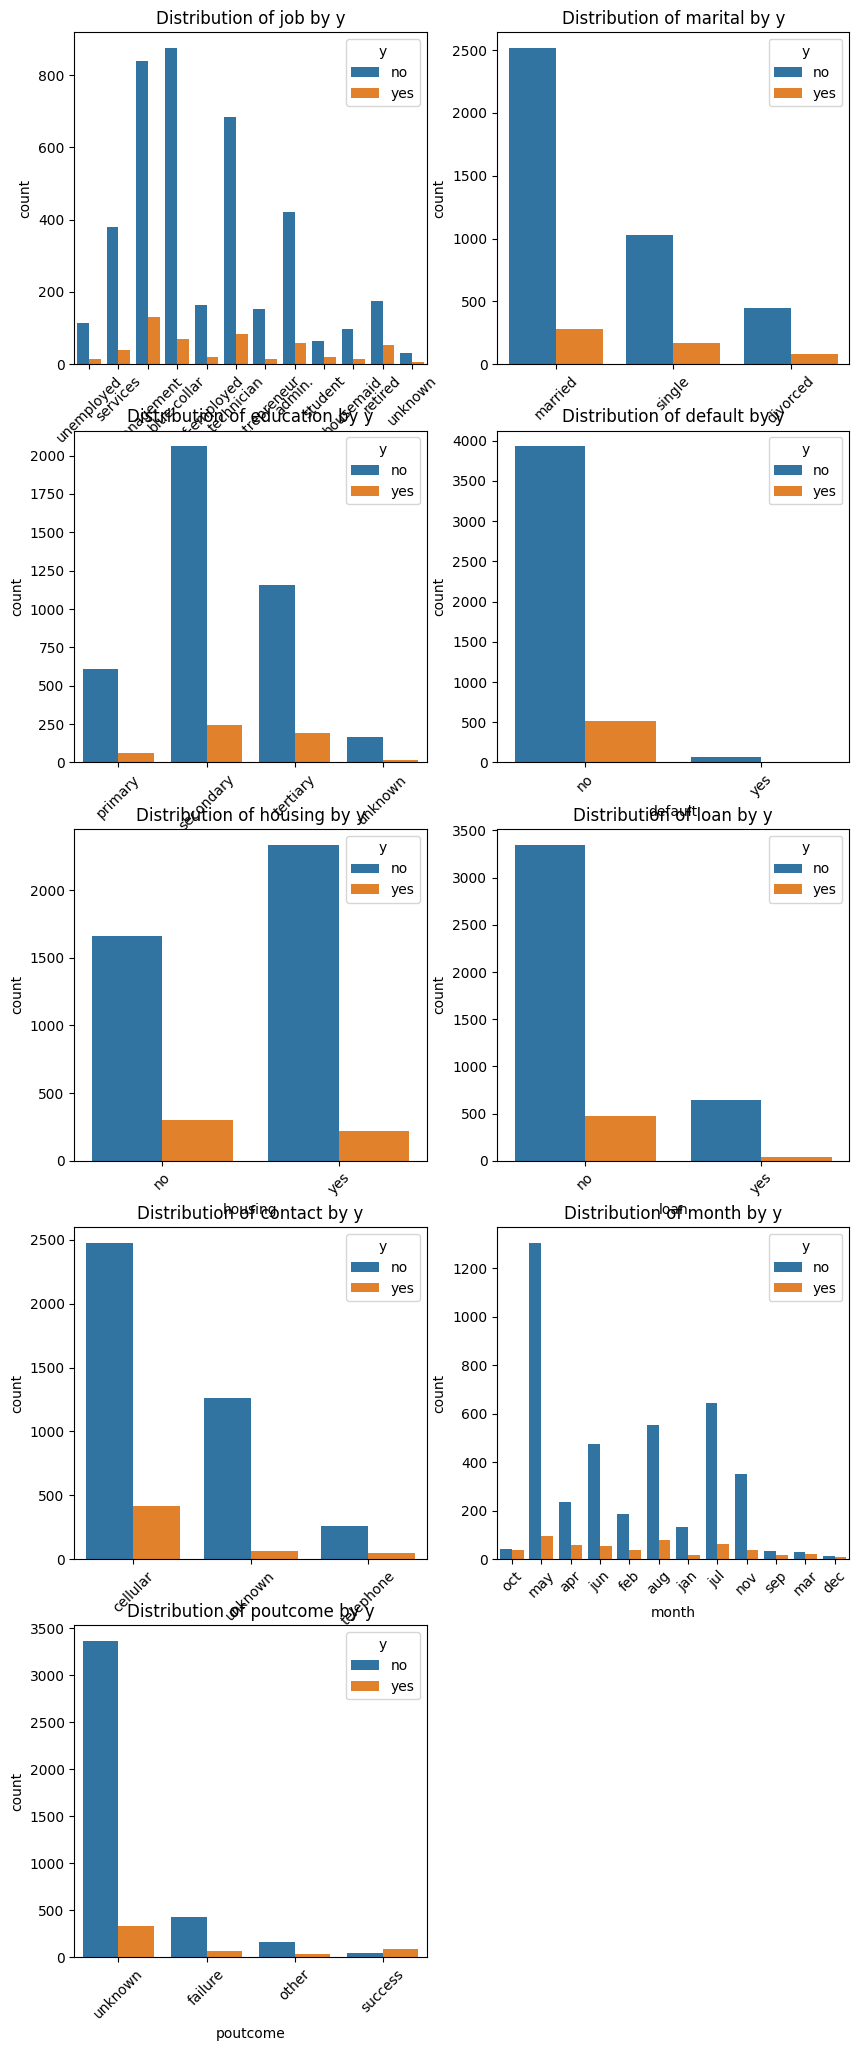

In [61]:
y='y'
plt.figure(figsize=(10, 25))
for i, col in enumerate(categorical_features):
    plt.subplot(5,2,i+1)
    sns.countplot(data=df, x=col, hue=y)
    plt.title(f'Distribution of {col} by {y}')
    plt.xticks(rotation=45)
    plt.legend(title=y)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


ss = StandardScaler()
le = LabelEncoder()

X = df.drop('y',axis=1)
Y = df['y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=SEED)

# 삭제 x
print(len(X_train[(X_train['duration']>=2300) & (X_train['y']=='yes')]))
print(len(X_train[(X_train['duration']>=2300) & (X_train['y']=='no')]))

print(len(X_train[(X_train['pdays']>=600) & (X_train['y']=='yes')]))
print(len(X_train[(X_train['pdays']>=600) & (X_train['y']=='no')]))

print(X_train[X_train['campaign']>=40])
print(X_train[X_train['balance']>=30000])


X_train = X_train[X_train['campaign']<40] # 삭제
X_train = X_train[X_train['balance']<30000] # 삭제

for c in categorical_features:
  X_train[c] = le.fit_transform(X_train[c])
  X_test[c] = le.transform(X_test[c])


# Y_train = le.fit_transform(Y_train)
# Y_test = le.transform(Y_test)

X_train[numerical_features] = ss.fit_transform(X_train[numerical_features])
X_test[numerical_features] = ss.transform(X_test[numerical_features])

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=SEED)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('accuracy', accuracy_score(Y_test, Y_pred))
print('recall', recall_score(Y_test, Y_pred, average='macro'))
print('precision', precision_score(Y_test, Y_pred, average='macro'))
print('f1', f1_score(Y_test, Y_pred, average='macro'))

accuracy 0.8729281767955801
recall 0.6956604203019497
precision 0.678345857729012
f1 0.6863519789283982


In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(class_weight={'no':1,'yes':2}, random_state=SEED)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('accuracy', accuracy_score(Y_test, Y_pred))
print('recall', recall_score(Y_test, Y_pred, average='macro'))
print('precision', precision_score(Y_test, Y_pred, average='macro'))
print('f1', f1_score(Y_test, Y_pred, average='macro'))

accuracy 0.8828729281767956
recall 0.7146840148698885
precision 0.7004687463102464
f1 0.7071948331013601


In [10]:
from sklearn.ensemble import RandomForestClassifier


In [11]:
clf = RandomForestClassifier(class_weight={'no':1,'yes':2}, random_state=SEED)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('accuracy', accuracy_score(Y_test, Y_pred))
print('recall', recall_score(Y_test, Y_pred, average='macro'))
print('precision', precision_score(Y_test, Y_pred, average='macro'))
print('f1', f1_score(Y_test, Y_pred, average='macro'))

accuracy 0.8961325966850828
recall 0.5966100194724729
precision 0.7319097917804893
f1 0.6263353011455479


In [12]:
def experiment(clf_model, class_weight=None):
  clf = clf_model(class_weight=class_weight, random_state=SEED)
  clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_pred)
  rec = recall_score(Y_test, Y_pred, average='macro')
  pre = precision_score(Y_test, Y_pred, average='macro')
  f1 = f1_score(Y_test, Y_pred, average='macro')
  print('accuracy', acc)
  print('recall', rec)
  print('precision', pre)
  print('f1', f1)
  return {'acc': acc,
          'rec': rec,
          'pre': pre,
          'f1': f1}

In [13]:
from sklearn.svm import SVC

clf = SVC(class_weight={'no':1,'yes':2}, random_state=SEED)

In [14]:
from collections import defaultdict

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clfs = {'dt':DecisionTreeClassifier, 'rf':RandomForestClassifier, 'svm':SVC}
class_weights = [None, {'no':1,'yes':2}, {'no':1,'yes':5}, {'no':1,'yes':10}]
metrics = defaultdict(list)
exp_name = []
for key, clf in clfs.items():
  for cw in class_weights:
    print('='*5,key, cw,'='*5)
    metric = experiment(clf, cw)
    for k,v in metric.items():
      metrics[k].append(v)
    if cw is None:
      exp_name.append(key+'_no_cw')
    else:
      exp_name.append(key+f'_cw_n1_y{cw["yes"]}')

===== dt None =====
accuracy 0.8729281767955801
recall 0.6956604203019497
precision 0.678345857729012
f1 0.6863519789283982
===== dt {'no': 1, 'yes': 2} =====
accuracy 0.8828729281767956
recall 0.7146840148698885
precision 0.7004687463102464
f1 0.7071948331013601
===== dt {'no': 1, 'yes': 5} =====
accuracy 0.876243093922652
recall 0.6751068457122626
precision 0.6783129892871859
f1 0.6766867408390324
===== dt {'no': 1, 'yes': 10} =====
accuracy 0.8795580110497238
recall 0.6948954302910756
precision 0.6898120782227477
f1 0.692300733961552
===== rf None =====
accuracy 0.9005524861878453
recall 0.6215006448676125
precision 0.7536426987646501
f1 0.6561201742831088
===== rf {'no': 1, 'yes': 2} =====
accuracy 0.8961325966850828
recall 0.5966100194724729
precision 0.7319097917804893
f1 0.6263353011455479
===== rf {'no': 1, 'yes': 5} =====
accuracy 0.8972375690607735
recall 0.5882646738992995
precision 0.7425806227411732
f1 0.6173431113576329
===== rf {'no': 1, 'yes': 10} =====
accuracy 0.89613

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy 0.8917127071823204
recall 0.5
precision 0.4458563535911602
f1 0.4713785046728972
===== svm {'no': 1, 'yes': 2} =====
accuracy 0.8961325966850828
recall 0.5966100194724729
precision 0.7319097917804893
f1 0.6263353011455479
===== svm {'no': 1, 'yes': 5} =====
accuracy 0.8662983425414365
recall 0.7726272665199909
precision 0.6893741107031812
f1 0.7182709055311572
===== svm {'no': 1, 'yes': 10} =====
accuracy 0.7657458563535912
recall 0.7969299243861113
precision 0.6347228437345818
f1 0.644165998991068


In [16]:
np.array(exp_name).reshape(3,-1)

array([['dt_no_cw', 'dt_cw_n1_y2', 'dt_cw_n1_y5', 'dt_cw_n1_y10'],
       ['rf_no_cw', 'rf_cw_n1_y2', 'rf_cw_n1_y5', 'rf_cw_n1_y10'],
       ['svm_no_cw', 'svm_cw_n1_y2', 'svm_cw_n1_y5', 'svm_cw_n1_y10']],
      dtype='<U13')

In [17]:
np.array(metrics['f1']).reshape(3,-1)

array([[0.68635198, 0.70719483, 0.67668674, 0.69230073],
       [0.65612017, 0.6263353 , 0.61734311, 0.59907439],
       [0.4713785 , 0.6263353 , 0.71827091, 0.644166  ]])

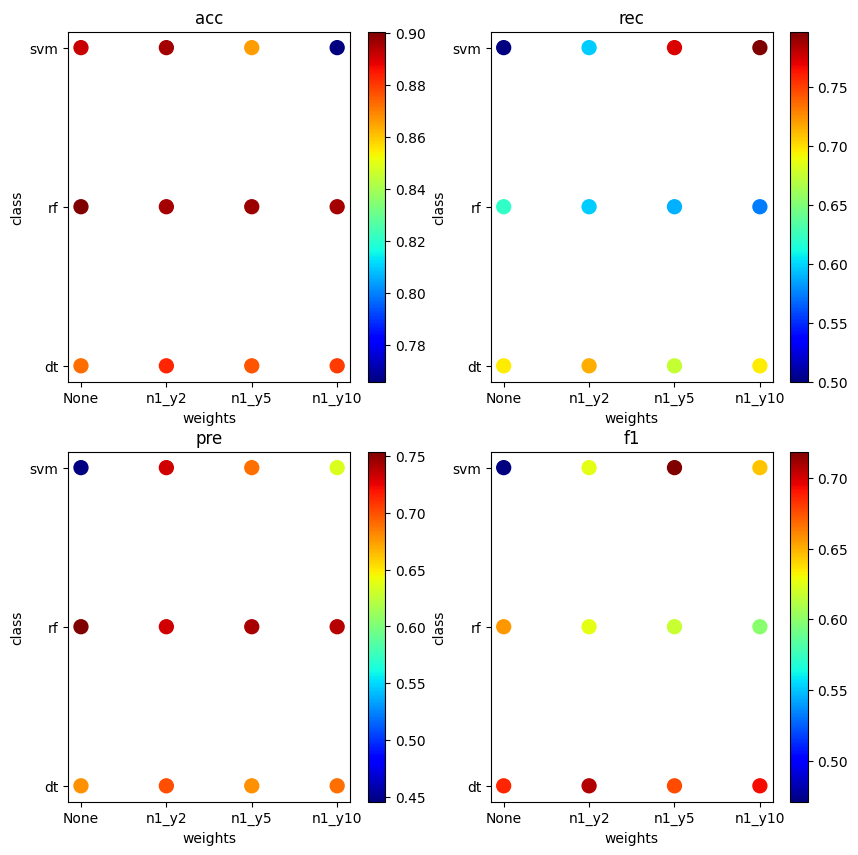

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#3d 렌더링에 필요한 라이브러리입니다.
from mpl_toolkits.mplot3d import Axes3D


x = [0,1,2,3]
y = [0,1,2]
X_grid,Y_grid = np.meshgrid(x,y)
#figure 객체를 만듭니다.
fig = plt.figure(figsize = (10,10))

#서브플롯 ax를 만드세요.
for i,(k, metric) in enumerate(metrics.items()):
  m=np.array(metric).reshape(3,-1)
  # ax = fig.add_subplot(2,2,i+1,projection = "3d")

  # #플롯합니다.
  # surf = ax.plot_surface(X_grid,Y_grid,m,cmap='Purples',alpha=0.8)
  # ax.view_init(elev=90,azim=0)
  # fig.colorbar(surf,shrink=0.5,aspect=5)
  # ax.set_title(k)
  # ax.set_xlabel('weights')
  # ax.set_ylabel('class')
  # ax.set_zlabel(k)
  # ax.set_xticks(x,['None','n1_y2','n1_y5','n1_y10'])
  # ax.set_yticks(y,['dt','rf','svm'])

  ax = fig.add_subplot(2,2,i+1)
  plt.scatter(X_grid.flatten(),Y_grid.flatten(),c=m.flatten(),s=100, cmap='jet')
  ax.set_title(k)
  ax.set_xlabel('weights')
  ax.set_ylabel('class')
  ax.set_xticks(x,['None','n1_y2','n1_y5','n1_y10'])
  ax.set_yticks(y,['dt','rf','svm'])
  plt.colorbar()
plt.show()

![Precision](https://t1.daumcdn.net/cfile/tistory/99F66B345BE0596109)
Precision: 실제 no를 모델이 no로 예측하는 것이 중요!

![Recall](https://t1.daumcdn.net/cfile/tistory/997188435BE05B0628)
Recall: 실제 yes를 모델이 yes로 예측하는 것이 중요!

![F1](https://t1.daumcdn.net/cfile/tistory/993482335BE0641515)
Precision과 Recall을 모두 고려

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('y',axis=1)
Y = df['y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=SEED)

# 삭제 x
print(len(X_train[(X_train['duration']>=2300) & (X_train['y']=='yes')]))
print(len(X_train[(X_train['duration']>=2300) & (X_train['y']=='no')]))

print(len(X_train[(X_train['pdays']>=600) & (X_train['y']=='yes')]))
print(len(X_train[(X_train['pdays']>=600) & (X_train['y']=='no')]))

print(X_train[X_train['campaign']>=40])
print(X_train[X_train['balance']>=30000])


X_train = X_train[X_train['campaign']<40] # 삭제
X_train = X_train[X_train['balance']<30000] # 삭제

oe = OrdinalEncoder()
X_train[["marital",'job','contact','education','month',"poutcome","housing","loan",'default']] = oe.fit_transform(X_train[["marital",'job','contact','education','month',"poutcome","housing","loan",'default']])
X_train.head()


# y는 label encoding을 사용
from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# Y_train = le.fit_transform(Y_train) # fit + transform
# Y_train

# robust scaler 사용
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_train

# OrdinalEncoder 인코딩 진행
X_test[["marital",'job','contact','education','month',"poutcome","housing","loan",'default']] = oe.transform(X_test[["marital",'job','contact','education','month',"poutcome","housing","loan",'default']])
X_test.head()

# y는 label encoding
# Y_test = le.transform(Y_test)
# Y_test

# robust scaler
X_test = rs.transform(X_test)
X_test

array([[ 0.75      , -0.33333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6875    ,  0.        ,  0.        , ...,  3.        ,
         5.        , -2.        ],
       [ 0.6875    ,  0.83333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.8125    ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.5       ,  0.83333333,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.9375    ,  0.5       ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import defaultdict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def experiment(clf_model, class_weight=None):
  clf = clf_model(class_weight=class_weight, random_state=SEED)
  clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_pred)
  rec = recall_score(Y_test, Y_pred, average='macro')
  pre = precision_score(Y_test, Y_pred, average='macro')
  f1 = f1_score(Y_test, Y_pred, average='macro')
  print('accuracy', acc)
  print('recall', rec)
  print('precision', pre)
  print('f1', f1)
  return {'acc': acc,
          'rec': rec,
          'pre': pre,
          'f1': f1}

clfs = {'dt':DecisionTreeClassifier, 'rf':RandomForestClassifier, 'svm':SVC}
class_weights = [None, {'no':1,'yes':2}, {'no':1,'yes':5}, {'no':1,'yes':10}]
metrics = defaultdict(list)
exp_name = []
for key, clf in clfs.items():
  for cw in class_weights:
    print('='*5,key, cw,'='*5)
    metric = experiment(clf, cw)
    for k,v in metric.items():
      metrics[k].append(v)
    if cw is None:
      exp_name.append(key+'_no_cw')
    else:
      exp_name.append(key+f'_cw_n1_y{cw["yes"]}')

===== dt None =====
accuracy 0.8718232044198895
recall 0.6950408416154567
precision 0.6763865065751858
f1 0.6849491020839336
===== dt {'no': 1, 'yes': 2} =====
accuracy 0.8806629834254144
recall 0.7134448574969021
precision 0.6961115758167201
f1 0.7041982422584316
===== dt {'no': 1, 'yes': 5} =====
accuracy 0.8751381215469614
recall 0.6744872670257694
precision 0.6760679289578443
f1 0.6752718901325714
===== dt {'no': 1, 'yes': 10} =====
accuracy 0.8773480662983425
recall 0.6936562729180892
precision 0.6854042079267849
f1 0.6893871228073429
===== rf None =====
accuracy 0.901657458563536
recall 0.6221202235541057
precision 0.7605622403280634
f1 0.6577344908617297
===== rf {'no': 1, 'yes': 2} =====
accuracy 0.8950276243093923
recall 0.5959904407859798
precision 0.7247734944039794
f1 0.6248925615507785
===== rf {'no': 1, 'yes': 5} =====
accuracy 0.8972375690607735
recall 0.5882646738992995
precision 0.7425806227411732
f1 0.6173431113576329
===== rf {'no': 1, 'yes': 10} =====
accuracy 0.897

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy 0.8917127071823204
recall 0.5
precision 0.4458563535911602
f1 0.4713785046728972
===== svm {'no': 1, 'yes': 2} =====
accuracy 0.881767955801105
recall 0.5437308752497281
precision 0.6276481877906548
f1 0.5534450239567625
===== svm {'no': 1, 'yes': 5} =====
accuracy 0.8397790055248618
recall 0.6322484384088208
precision 0.6118203006393397
f1 0.6203870042032973
===== svm {'no': 1, 'yes': 10} =====
accuracy 0.7635359116022099
recall 0.7463836835849582
precision 0.6167313659945125
f1 0.6258481059610836


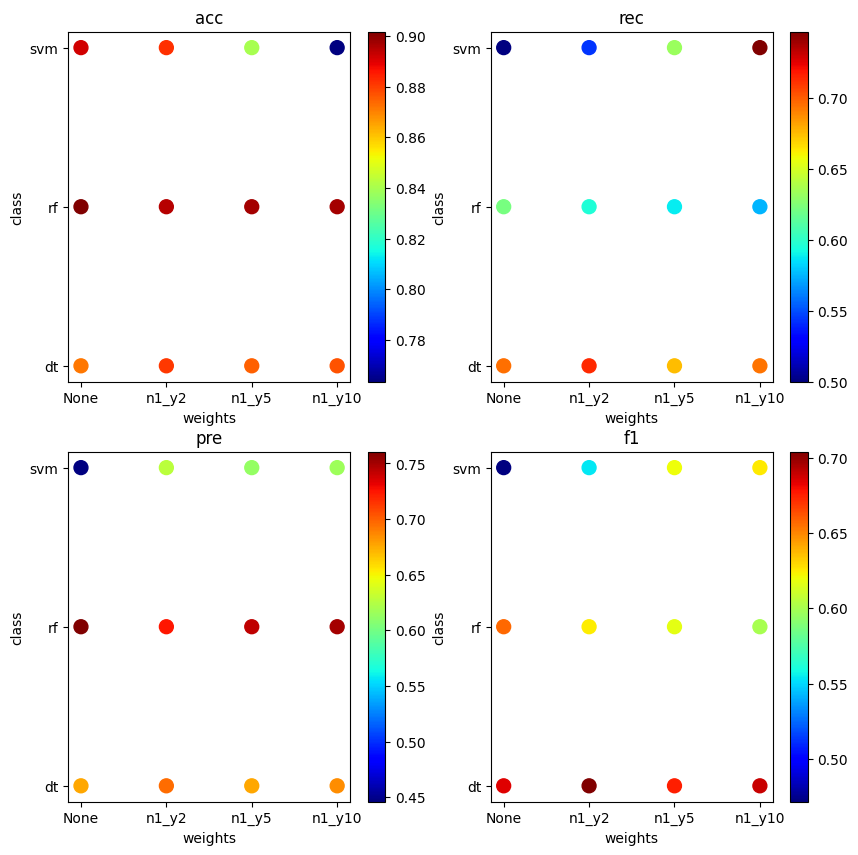

In [27]:
import numpy as np
import matplotlib.pyplot as plt
#3d 렌더링에 필요한 라이브러리입니다.
from mpl_toolkits.mplot3d import Axes3D


x = [0,1,2,3]
y = [0,1,2]
X_grid,Y_grid = np.meshgrid(x,y)
#figure 객체를 만듭니다.
fig = plt.figure(figsize = (10,10))

#서브플롯 ax를 만드세요.
for i,(k, metric) in enumerate(metrics.items()):
  m=np.array(metric).reshape(3,-1)
  # ax = fig.add_subplot(2,2,i+1,projection = "3d")

  # #플롯합니다.
  # surf = ax.plot_surface(X_grid,Y_grid,m,cmap='Purples',alpha=0.8)
  # ax.view_init(elev=90,azim=0)
  # fig.colorbar(surf,shrink=0.5,aspect=5)
  # ax.set_title(k)
  # ax.set_xlabel('weights')
  # ax.set_ylabel('class')
  # ax.set_zlabel(k)
  # ax.set_xticks(x,['None','n1_y2','n1_y5','n1_y10'])
  # ax.set_yticks(y,['dt','rf','svm'])

  ax = fig.add_subplot(2,2,i+1)
  plt.scatter(X_grid.flatten(),Y_grid.flatten(),c=m.flatten(),s=100, cmap='jet')
  ax.set_title(k)
  ax.set_xlabel('weights')
  ax.set_ylabel('class')
  ax.set_xticks(x,['None','n1_y2','n1_y5','n1_y10'])
  ax.set_yticks(y,['dt','rf','svm'])
  plt.colorbar()
plt.show()

In [37]:
print('Standard-Le')
print('''
===== dt {'no': 1, 'yes': 2} =====
accuracy 0.8828729281767956
recall 0.7146840148698885
precision 0.7004687463102464
f1 0.7071948331013601''')




Standard-Le

===== dt {'no': 1, 'yes': 2} =====
accuracy 0.8828729281767956
recall 0.7146840148698885
precision 0.7004687463102464
f1 0.7071948331013601


In [36]:
print('Robust-Oe')
print('''
===== dt {'no': 1, 'yes': 2} =====
accuracy 0.8806629834254144
recall 0.7134448574969021
precision 0.6961115758167201
f1 0.7041982422584316''')

Robust-Oe

===== dt {'no': 1, 'yes': 2} =====
accuracy 0.8806629834254144
recall 0.7134448574969021
precision 0.6961115758167201
f1 0.7041982422584316


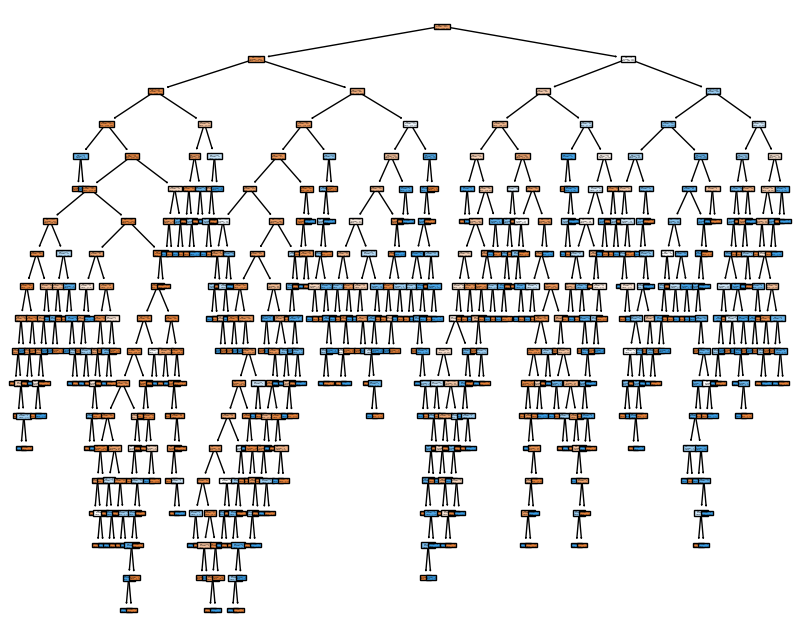

In [33]:
clf = DecisionTreeClassifier(class_weight={'no':1,'yes':2}, random_state=SEED)
clf.fit(X_train,Y_train)

from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=df.drop('y',axis=1).columns)
plt.show()

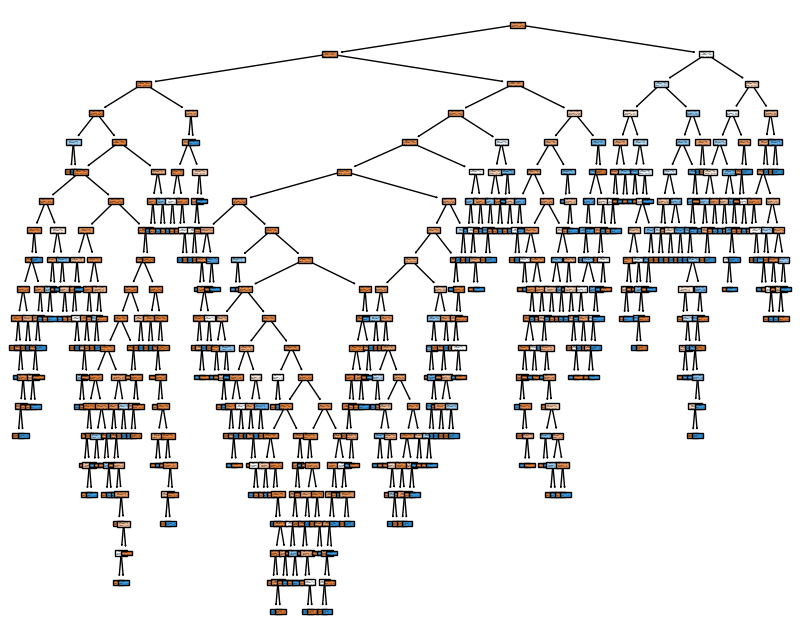

In [34]:
clf = DecisionTreeClassifier(class_weight=None, random_state=SEED)
clf.fit(X_train,Y_train)

from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=df.drop('y',axis=1).columns)
plt.show()